# Wine Analysis 

In [2]:
install.packages("e1071")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)


In [3]:
install.packages("GGally")
library(tidyverse)
library(digest)
library(repr)
library(caret)
library(e1071)
library(GGally)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [4]:
white_wine <- read_delim(file = "data/wine_quality_white.csv", delim = ";", col_names = TRUE)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_integer()
)


In [5]:
red_wine <- read_delim(file = "data/wine_quality_red.csv", delim = ";", col_names = TRUE)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_integer(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_integer()
)
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col                expected              actual file                    expected   <int> <chr>              <chr>                 <chr>  <chr>                   actual 1  1296 total sulfur diox… no trailing characte… .5     'data/wine_quality_red… file 2  1297 total sulfur diox… no trailing characte… .5     'data/wine_quality_red…
”

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning

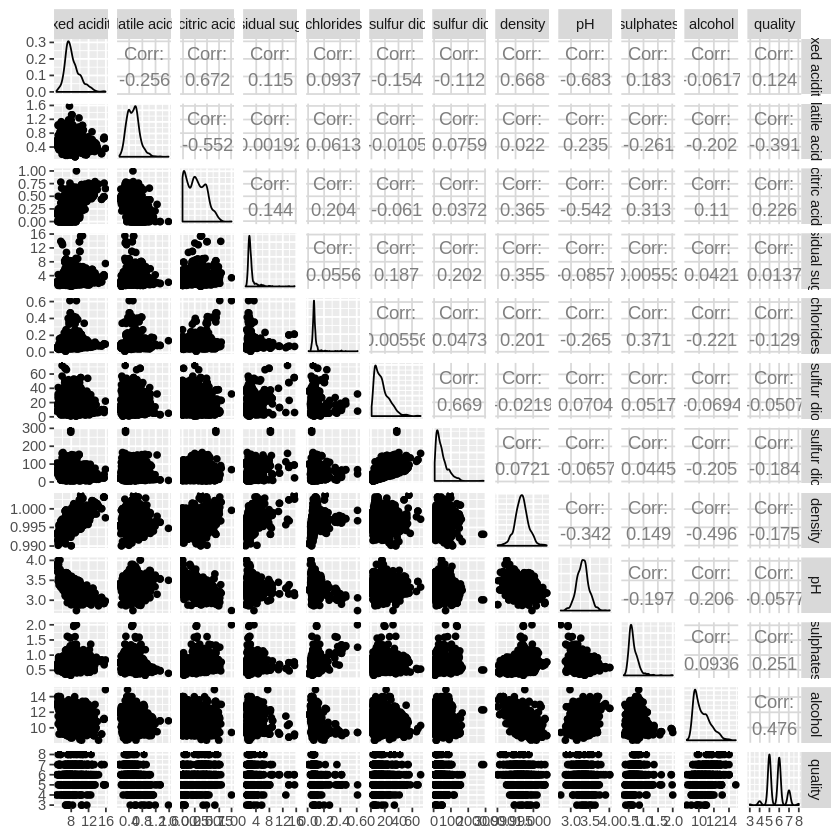

In [6]:
red_wine_pairs  <- red_wine  %>% ggpairs()
red_wine_pairs

In [7]:
white_wine_mean  <- white_wine  %>% select(-quality) %>% colMeans()
white_wine_mean

fixed acidity     volatile acidity          citric acid 
          6.85478767           0.27824112           0.33419151 
      residual sugar            chlorides  free sulfur dioxide 
          6.39141486           0.04577236          35.30808493 
total sulfur dioxide              density                   pH 
        138.36065741           0.99402738           3.18826664 
           sulphates              alcohol 
          0.48984688          10.51426705

In [8]:
red_wine_mean  <- red_wine  %>% select(-quality) %>% colMeans()
red_wine_mean

fixed acidity     volatile acidity          citric acid 
          8.31963727           0.52782051           0.27097561 
      residual sugar            chlorides  free sulfur dioxide 
          2.53880550           0.08746654          15.87492183 
total sulfur dioxide              density                   pH 
                  NA           0.99674668           3.31111320 
           sulphates              alcohol 
          0.65814884          10.42298311

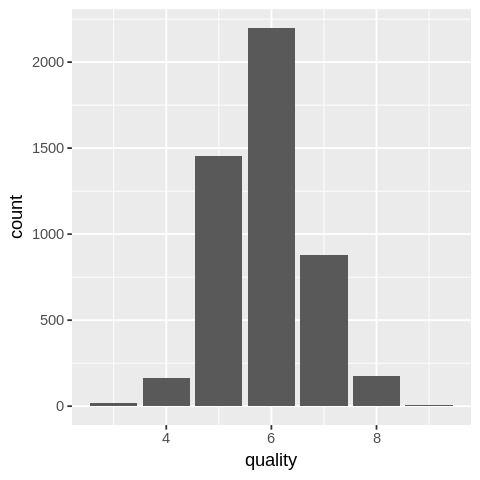

In [9]:
options(repr.plot.height = 4, repr.plot.width = 4)
white_wine_bar_chart  <- white_wine  %>% ggplot(aes(x = quality))+
                    geom_bar()
white_wine_bar_chart

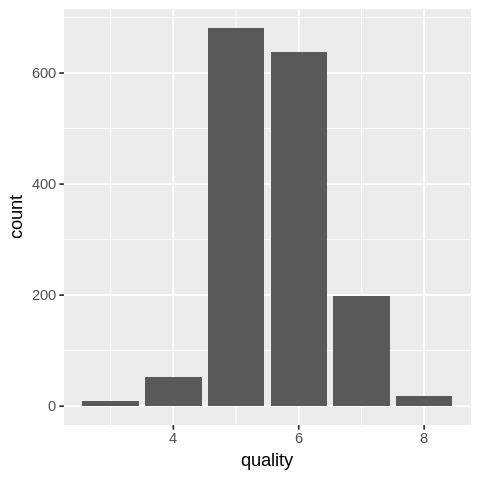

In [10]:
red_wine_bar_chart  <- red_wine  %>% ggplot(aes(x = quality))+
                    geom_bar()
red_wine_bar_chart

In [11]:
red_wine <- red_wine %>% 
    mutate(type = "red")

head(red_wine)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


In [12]:
white_wine <- white_wine %>% 
    mutate(type = "white")

head(white_wine)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,white
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,white
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white


In [13]:
wine_data <- rbind(red_wine, white_wine)
glimpse(wine_data)

Observations: 6,497
Variables: 13
$ `fixed acidity`        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8...
$ `volatile acidity`     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0....
$ `citric acid`          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0....
$ `residual sugar`       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0,...
$ chlorides              <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0....
$ `free sulfur dioxide`  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 1...
$ `total sulfur dioxide` <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65,...
$ density                <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.99...
$ pH                     <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3....
$ sulphates              <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0....
$ alcohol                <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5...
$ quality                <int> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5,...
$ type            

### Doing KNN Analysis to check if it is more accurate with only white wine

In [14]:
scaled_white_wine_data  <- white_wine  %>% select(-type, -quality)  %>% scale(center = FALSE)
head(scaled_white_wine_data)
scaled_white_wine_data  <- data.frame(scaled_white_wine_data, quality = white_wine$quality)
head(scaled_white_wine_data)
colnames(scaled_white_wine_data)  <-  c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", 
                        "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", 
                        "quality")

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1.0134309,0.9122795,1.0127692,2.5367895,0.8871633,1.1481392,1.1744078,1.0069072,0.9398009,0.8946063,0.8311998
0.9120878,1.0136438,0.9565042,0.1960804,0.9660223,0.3571989,0.9118931,0.9998658,1.0337810,0.9741268,0.8973179
1.1726843,0.9460676,1.1252991,0.8455965,0.9857370,0.7654261,0.6701032,1.0009723,1.0212503,0.8747261,0.9539906
1.0423861,0.7771269,0.9002393,1.0416769,1.1434550,1.1991676,1.2849402,1.0014753,0.9993216,0.7952056,0.9350997
1.0423861,0.7771269,0.9002393,1.0416769,1.1434550,1.1991676,1.2849402,1.0014753,0.9993216,0.7952056,0.9350997
1.1726843,0.9460676,1.1252991,0.8455965,0.9857370,0.7654261,0.6701032,1.0009723,1.0212503,0.8747261,0.9539906


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1.0134309,0.9122795,1.0127692,2.5367895,0.8871633,1.1481392,1.1744078,1.0069072,0.9398009,0.8946063,0.8311998,6
0.9120878,1.0136438,0.9565042,0.1960804,0.9660223,0.3571989,0.9118931,0.9998658,1.0337810,0.9741268,0.8973179,6
1.1726843,0.9460676,1.1252991,0.8455965,0.9857370,0.7654261,0.6701032,1.0009723,1.0212503,0.8747261,0.9539906,6
1.0423861,0.7771269,0.9002393,1.0416769,1.1434550,1.1991676,1.2849402,1.0014753,0.9993216,0.7952056,0.9350997,6
1.0423861,0.7771269,0.9002393,1.0416769,1.1434550,1.1991676,1.2849402,1.0014753,0.9993216,0.7952056,0.9350997,6
1.1726843,0.9460676,1.1252991,0.8455965,0.9857370,0.7654261,0.6701032,1.0009723,1.0212503,0.8747261,0.9539906,6


In [22]:
set.seed(2017)
training_rows <- scaled_white_wine_data %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.75, list = FALSE)

training_set_white <- scaled_white_wine_data %>% 
    slice(training_rows)

testing_set_white <- scaled_white_wine_data %>% 
    slice(-training_rows)

X_train_white <- training_set_white %>% 
    select(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, 
           density, pH, sulphates, alcohol) %>% 
    data.frame()

Y_train_white <- training_set_white %>% 
    select(quality) %>% 
    unlist()
X_test_white <- testing_set_white %>% 
    select(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, 
           density, pH, sulphates, alcohol) %>% 
    data.frame()

Y_test_white <- testing_set_white %>% 
    select(quality) %>% 
    unlist()

In [17]:
train_control_white <- trainControl(method = "cv", number = 10)
k_white = data.frame(k = seq(from = 1, to = 50 , by = 1)) 
set.seed(2017)
knn_cv_white <- train(x = X_train_white, y = Y_train_white, method = "knn", tuneGrid = k_white, trControl = train_control_white) 
knn_cv_white

k-Nearest Neighbors 

3674 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3307, 3306, 3306, 3307, 3307, 3306, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   1  0.8391528  0.3023861  0.4953523
   2  0.7863748  0.3043154  0.5413338
   3  0.7645973  0.3027467  0.5603347
   4  0.7521262  0.3069156  0.5626282
   5  0.7462552  0.3073245  0.5627948
   6  0.7429545  0.3075883  0.5628838
   7  0.7421007  0.3054551  0.5653201
   8  0.7369821  0.3112125  0.5618355
   9  0.7341745  0.3145066  0.5601039
  10  0.7317776  0.3177931  0.5605696
  11  0.7315636  0.3175589  0.5626371
  12  0.7320442  0.3165243  0.5651974
  13  0.7323037  0.3159415  0.5670190
  14  0.7334827  0.3138994  0.5681195
  15  0.7322792  0.3165010  0.5676659
  16  0.7329427  0.3157933  0.5687438
  17  0.7323824  0.3172387  0.5696688
  18  0.7317453  0.3188896  0.5697874
  19  0.7316987  0.3194392  0.5704309
  20  0.7320425  0.3

In [18]:
set.seed(2017)
knn_white  <- train(x = X_train_white, y = Y_train_white, method='knn', tuneGrid= data.frame(k=11))
knn_white

k-Nearest Neighbors 

3674 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3674, 3674, 3674, 3674, 3674, 3674, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7644727  0.2734873  0.5844287

Tuning parameter 'k' was held constant at a value of 11

In [20]:
predict_white  <- predict(knn_white, X_test_white)
error_df_white  <- data.frame( obs = Y_test_white, pred = predict_white)
test_error_white  <- defaultSummary(error_df_white)
test_error_white

RMSE  Rsquared       MAE 
0.7535085 0.2867016 0.5786102

#### End of White Wine KNN, Start of White Wine Linear Model  

In [26]:
set.seed(2017)
white_wine_data  <- white_wine  %>% select(-type)
training_rows <- white_wine_data %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.75, list = FALSE)

training_set_white_lm <- white_wine_data %>% 
    slice(training_rows)

testing_set_white_lm <- white_wine_data %>% 
    slice(-training_rows)

X_train_white_lm <- training_set_white_lm %>% 
    select(-quality) %>% 
    data.frame()

Y_train_white_lm <- training_set_white_lm %>% 
    select(quality) %>% 
    unlist()
X_test_white_lm <- testing_set_white_lm %>% 
    select(-quality) %>% 
    data.frame()

Y_test_white_lm <- testing_set_white_lm %>% 
    select(quality) %>% 
    unlist()


In [27]:
lm_reg_white <- train(x = X_train_white_lm, y = Y_train_white_lm, method = "lm")
lm_reg_white 

Linear Regression 

3674 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3674, 3674, 3674, 3674, 3674, 3674, ... 
Resampling results:

  RMSE       Rsquared  MAE     
  0.7514605  0.281173  0.584359

Tuning parameter 'intercept' was held constant at a value of TRUE

In [28]:
lm_white_coef  <- lm_reg_white$finalModel$coefficients
lm_white_coef

(Intercept)        fixed.acidity     volatile.acidity 
        1.388181e+02         5.524445e-02        -1.828671e+00 
         citric.acid       residual.sugar            chlorides 
        6.669865e-02         7.425347e-02        -4.080444e-01 
 free.sulfur.dioxide total.sulfur.dioxide              density 
        4.963553e-03        -4.725533e-04        -1.388047e+02 
                  pH            sulphates              alcohol 
        6.589437e-01         6.111498e-01         2.073424e-01

In [31]:
test_pred_white_lm <- predict(lm_reg_white, X_test_white_lm)
lm_regValues_white <- data.frame(obs = Y_test_white_lm, pred = test_pred_white_lm)
lm_defaultSum_white <- defaultSummary(lm_regValues_white)
lm_defaultSum_white

RMSE  Rsquared       MAE 
0.7654548 0.2567267 0.5909996

#### End of White Wine Analysis

In [32]:
scaled_wine_data <- wine_data%>%
    select(-c(quality, type)) %>% 
    scale(center = FALSE) 
scaled_wine_data <- data.frame(scaled_wine_data, quality = wine_data$quality, type = wine_data$type)
colnames(scaled_wine_data) <- c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", 
                        "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", 
                        "quality", "type")
glimpse(scaled_wine_data)

Observations: 6,497
Variables: 13
$ fixed_acidity        <dbl> 1.0093572, 1.0639170, 1.0639170, 1.5276757, 1....
$ volatile_acidity     <dbl> 1.8543718, 2.3312103, 2.0133180, 0.7417487, 1....
$ citric_acid          <dbl> 0.00000000, 0.00000000, 0.11421113, 1.59895588...
$ residual_sugar       <dbl> 0.2628010, 0.3596225, 0.3181276, 0.2628010, 0....
$ chlorides            <dbl> 1.1499810, 1.4828702, 1.3920822, 1.1348497, 1....
$ free_sulfur_dioxide  <dbl> 0.3115035, 0.7079626, 0.4247776, 0.4814146, 0....
$ total_sulfur_dioxide <dbl> 0.2639162, 0.5200702, 0.4191611, 0.4657345, 0....
$ density              <dbl> 1.0030382, 1.0020329, 1.0022340, 1.0032392, 1....
$ pH                   <dbl> 1.0891279, 0.9929371, 1.0115547, 0.9805254, 1....
$ sulphates            <dbl> 1.0149448, 1.2324330, 1.1780610, 1.0511929, 1....
$ alcohol              <dbl> 0.8901364, 0.9280145, 0.9280145, 0.9280145, 0....
$ quality              <int> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5...
$ type            

In [33]:
scaled_wine_data <- na.omit(scaled_wine_data)
glimpse(scaled_wine_data)

Observations: 6,495
Variables: 13
$ fixed_acidity        <dbl> 1.0093572, 1.0639170, 1.0639170, 1.5276757, 1....
$ volatile_acidity     <dbl> 1.8543718, 2.3312103, 2.0133180, 0.7417487, 1....
$ citric_acid          <dbl> 0.00000000, 0.00000000, 0.11421113, 1.59895588...
$ residual_sugar       <dbl> 0.2628010, 0.3596225, 0.3181276, 0.2628010, 0....
$ chlorides            <dbl> 1.1499810, 1.4828702, 1.3920822, 1.1348497, 1....
$ free_sulfur_dioxide  <dbl> 0.3115035, 0.7079626, 0.4247776, 0.4814146, 0....
$ total_sulfur_dioxide <dbl> 0.2639162, 0.5200702, 0.4191611, 0.4657345, 0....
$ density              <dbl> 1.0030382, 1.0020329, 1.0022340, 1.0032392, 1....
$ pH                   <dbl> 1.0891279, 0.9929371, 1.0115547, 0.9805254, 1....
$ sulphates            <dbl> 1.0149448, 1.2324330, 1.1780610, 1.0511929, 1....
$ alcohol              <dbl> 0.8901364, 0.9280145, 0.9280145, 0.9280145, 0....
$ quality              <int> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5...
$ type            

In [34]:
set.seed(2017)
training_rows <- scaled_wine_data %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.75, list = FALSE)

training_set <- scaled_wine_data %>% 
    slice(training_rows)

testing_set <- scaled_wine_data %>% 
    slice(-training_rows)

X_train_type_all <- training_set %>% 
    select(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, 
           density, pH, sulphates, alcohol) %>% 
    data.frame()

Y_train_type_all <- training_set %>% 
    select(quality) %>% 
    unlist()
X_test_type_all <- testing_set %>% 
    select(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, 
           density, pH, sulphates, alcohol) %>% 
    data.frame()

Y_test_type_all <- testing_set %>% 
    select(quality) %>% 
    unlist()

In [35]:
train_control <- trainControl(method = "cv", number = 10)
k_lots_type_all = data.frame(k = seq(from = 1, to = 50 , by = 1)) 

In [36]:
set.seed(2017)
knn_cv_type_all <- train(x = X_train_type_all, y = Y_train_type_all, method = "knn", tuneGrid = k_lots_type_all, trControl = train_control) 
knn_cv_type_all

k-Nearest Neighbors 

4872 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4386, 4385, 4384, 4384, 4386, 4384, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   1  0.8267339  0.2952183  0.4872538
   2  0.7732313  0.3001630  0.5353860
   3  0.7511165  0.3078552  0.5504425
   4  0.7441366  0.3059202  0.5542082
   5  0.7333752  0.3135682  0.5521498
   6  0.7269065  0.3198000  0.5532944
   7  0.7291600  0.3123808  0.5595630
   8  0.7261304  0.3157205  0.5608260
   9  0.7254088  0.3157560  0.5620268
  10  0.7260392  0.3138172  0.5625144
  11  0.7256747  0.3139035  0.5640479
  12  0.7242954  0.3159488  0.5640929
  13  0.7229233  0.3186965  0.5637369
  14  0.7242782  0.3163696  0.5653398
  15  0.7240157  0.3170577  0.5665401
  16  0.7234681  0.3183264  0.5675373
  17  0.7237020  0.3182575  0.5684658
  18  0.7233448  0.3192448  0.5685453
  19  0.7241773  0.3181787  0.5691123
  20  0.7236934  0.3

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'Accuracy' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot(x)
19. by_

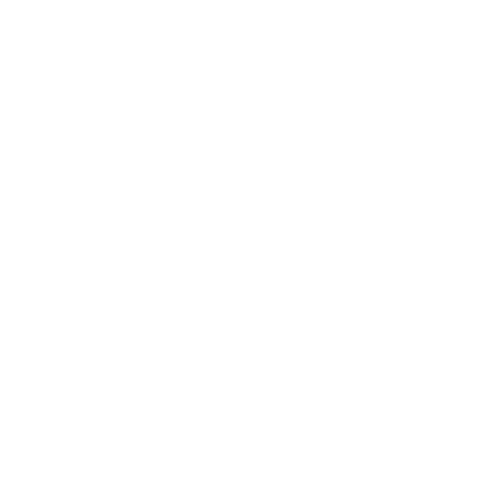

In [37]:
accuracy_vs_k_type_all <- knn_cv_type_all$results %>% 
    ggplot(aes(x = k, y = Accuracy)) +
    geom_point() +
    geom_line()
accuracy_vs_k_type_all

In [ ]:
#choose k=1
knn_model_type_all <- train(x = X_train_type_all, y = Y_train_type_all, method = "knn", tuneGrid = data.frame(k = 1))
test_pred_type_all <- predict(knn_model_type_all, X_test_type_all)
test_result_type_all <- confusionMatrix(test_pred_type_all, Y_test_type_all)
test_result_type_all

In [ ]:
#Changing predictors to first three
X_train_type_3 <- training_set %>% 
    select(fixed_acidity, volatile_acidity, citric_acid) %>% 
    data.frame()

Y_train_type_3 <- training_set %>% 
    select(type) %>% 
    unlist()
X_test_type_3 <- testing_set %>% 
    select(fixed_acidity, volatile_acidity, citric_acid) %>% 
    data.frame()

Y_test_type_3 <- testing_set %>% 
    select(type) %>% 
    unlist()

In [ ]:
train_control <- trainControl(method = "cv", number = 10)
k_lots_type_3 = data.frame(k = seq(from = 1, to = 100 , by = 2)) 

In [ ]:
set.seed(2017)
knn_cv_type_3 <- train(x = X_train_type_3, y = Y_train_type_3, method = "knn", tuneGrid = k_lots_type_3, trControl = train_control) 
knn_cv_type_3

In [ ]:
accuracy_vs_k_type_3 <- knn_cv_type_3$results %>% 
    ggplot(aes(x = k, y = Accuracy)) +
    geom_point() +
    geom_line()
accuracy_vs_k_type_3

In [ ]:
# CHOOSE k= 11
knn_model_type_3 <- train(x = X_train_type_3, y = Y_train_type_3, method = "knn", tuneGrid = data.frame(k = 11))
test_pred_type_3 <- predict(knn_model_type_3, X_test_type_3)
test_result_type_3 <- confusionMatrix(test_pred_type_3, Y_test_type_3)
test_result_type_3

In [ ]:
#changing predictors to first six
X_train_type_6 <- training_set %>% 
    select(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide) %>% 
    data.frame()

Y_train_type_6 <- training_set %>% 
    select(type) %>% 
    unlist()
X_test_type_6 <- testing_set %>% 
    select(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide) %>% 
    data.frame()

Y_test_type_6 <- testing_set %>% 
    select(type) %>% 
    unlist()

train_control <- trainControl(method = "cv", number = 10)
k_lots_type_6 = data.frame(k = seq(from = 1, to = 100 , by = 2))

set.seed(2017)
knn_cv_type_6 <- train(x = X_train_type_6, y = Y_train_type_6, method = "knn", tuneGrid = k_lots_type_6, trControl = train_control) 
knn_cv_type_6

In [ ]:
accuracy_vs_k_type_6 <- knn_cv_type_6$results %>% 
    ggplot(aes(x = k, y = Accuracy)) +
    geom_point() +
    geom_line()
accuracy_vs_k_type_6

In [ ]:
#choose k=11
knn_model_type_6 <- train(x = X_train_type_6, y = Y_train_type_6, method = "knn", tuneGrid = data.frame(k = 11))
test_pred_type_6 <- predict(knn_model_type_6, X_test_type_6)
test_result_type_6 <- confusionMatrix(test_pred_type_6, Y_test_type_6)
test_result_type_6